In [199]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.tree import export_graphviz
import numpy as np
import math

In [200]:
df = pd.read_csv("cancer_data.csv", sep = None, engine = "python")

### Explorando e tratando os dados

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [202]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [203]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [204]:
df.drop(columns = "Unnamed: 32", axis = 1, inplace = True)

In [205]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [206]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [207]:
M = df.loc[df.diagnosis == 'M']

In [208]:
B = df.loc[df.diagnosis == 'B']

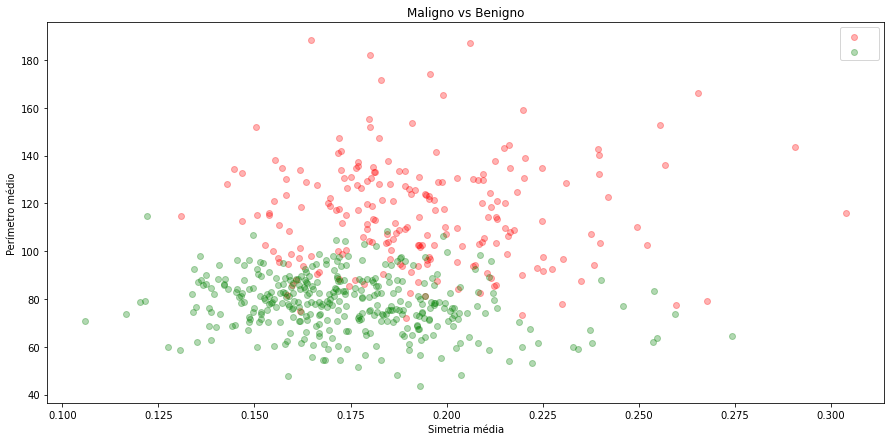

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.title("Maligno vs Benigno")
plt.xlabel("Simetria média")
plt.ylabel("Perímetro médio")
plt.scatter(M.symmetry_mean, M.perimeter_mean, color = "red", label = " ", alpha = 0.3)
plt.scatter(B.symmetry_mean, B.perimeter_mean, color = "green", label = " ", alpha = 0.3)
plt.legend()
plt.show()

### Analisando pureza

In [210]:
def indice_gini(valores_positivos, total_conjunto):
    prob_valores_positivos = valores_positivos/total_conjunto
    prob_valores_negativos = (1 - prob_valores_positivos)
    chute_valores_positivos = prob_valores_positivos
    chute_valores_negativos = (1 - chute_valores_positivos)
    erro_valores_positivos = prob_valores_negativos * chute_valores_positivos
    erro_valores_negativos = prob_valores_positivos * chute_valores_negativos
    gini = erro_valores_positivos + erro_valores_negativos
    return gini

In [217]:
# ------------------------------------------------------------------------------------------------------------- #
# Função: calc_geral
# Descrição: realiza calculo índice de gini
# Parametros: 
# Retorna: Retorna impureza
# -------------------------------------------------------------------------------------------------------------- #
def calc_geral():
    
    #Calculando parâmetros
    benigno = len(B)
    maligno = len(M)
    total = len(df)
    
    #Chamando função Gini
    impureza = indice_gini(benigno, total)
    
    return 1- impureza

In [218]:
calc_geral()

0.5324699392453075

### Aplicação

In [219]:
#-----------------------------------------------------------------------------#
#Separando dataframe em variáveis independentes (X) e dependente (Y)
#-----------------------------------------------------------------------------#
X = df.drop(['diagnosis', 'id'], axis=1).values
y = df.diagnosis.values

In [220]:
#--------------------------------------------------------------#
#Forma de padronização (Incorreta), não se padroniza alterando o dataframe inicial para aplicação de um modelo, padroniza-se os dados de treino e teste
#--------------------------------------------------------------#
import numpy as np
#X = X - np.min(X) / (np.max(X) - np.min(X))

In [221]:
# ------------------------------------------------------------------------------------------------------------- #
# Função: Separador
# Descrição: realiza a separação do conjunto de dados
# Parametros: 1) X = conjunto de dados para aprender, 2) y = Conjunto de dados para verificar aprendizado e prever
# Retorna: Retorna dados separados, para treino e para teste
#(test_size) = tamanho do teste
# -------------------------------------------------------------------------------------------------------------- #
def Separador(X, y):
    validador = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)

    for treino, teste in validador.split(X, y):
        X_train, X_test = X[treino], X[teste]
        y_train, y_test = y[treino], y[teste]
    return X_train, X_test, y_train, y_test

In [222]:
X_train, X_test, y_train, y_test = Separador(X, y)

In [223]:
len(X_train), len(y_train)

(398, 398)

In [224]:
len(X_test), len(y_test)

(171, 171)

In [225]:
#--------------------------------------------------------------#
#Forma de padronização (Correta)
#--------------------------------------------------------------#
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
classificador = tree.DecisionTreeClassifier(splitter = 'best', max_depth = 6, criterion = "gini", min_samples_split = 2)
#  random_state = 0 (valor que o modelo toma para iniciar o treino)
#, criterion = None (critério de impureza “gini” ou “entropy”)
#, splitter = None (estratégia para dividir o nó, "best" (mehor atributo) ou "random" (atributo aleatório))
#, max_depth = None (profundidade da árvore)
#, min_samples_split = None (numero de amostras mínima pra considerar um nó)

In [227]:
# ------------------------------------------------------------------------------------------------------------- #
# Função: Teste_treino
# Descrição: Ajusta o treino e o teste nas variáveis separadas acima
# Parametros: 1) classificador = modelo de aprendizado supervisionado, 2) X_train = Base para treino, 
#             3) X_test = dados para que o modelo teste o aprendizado  4) y_train = base para treino (0 e 1)
# Retorna: previsão realizado em cima do X_test
# -------------------------------------------------------------------------------------------------------------- #
def Teste_treino(classificador, X_train, X_test, y_train):
    arvore = classificador.fit(X_train, y_train)
    y_pred = arvore.predict(X_test)
    return arvore, y_pred

In [228]:
arvore, y_pred = Teste_treino(classificador, X_train, X_test, y_train)

In [229]:
text_representation = tree.export_text(arvore)
print(text_representation)

|--- feature_7 <= 0.01
|   |--- feature_23 <= 0.15
|   |   |--- feature_13 <= 0.09
|   |   |   |--- feature_25 <= 1.27
|   |   |   |   |--- feature_22 <= 0.17
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_22 >  0.17
|   |   |   |   |   |--- feature_3 <= -0.11
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- feature_3 >  -0.11
|   |   |   |   |   |   |--- class: B
|   |   |   |--- feature_25 >  1.27
|   |   |   |   |--- class: M
|   |   |--- feature_13 >  0.09
|   |   |   |--- feature_15 <= -0.62
|   |   |   |   |--- class: M
|   |   |   |--- feature_15 >  -0.62
|   |   |   |   |--- class: B
|   |--- feature_23 >  0.15
|   |   |--- feature_24 <= -1.42
|   |   |   |--- class: B
|   |   |--- feature_24 >  -1.42
|   |   |   |--- class: M
|--- feature_7 >  0.01
|   |--- feature_27 <= -0.14
|   |   |--- class: B
|   |--- feature_27 >  -0.14
|   |   |--- feature_23 <= -0.30
|   |   |   |--- feature_4 <= 0.86
|   |   |   |   |--- class: B
|   |   |   |--- feature

In [230]:
print(arvore.tree_.max_depth)

6


In [231]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# ------------------------------------------------------------------------------------------------------------- #
# Função: acuracia
# Descrição: Trás 4 formas de analisarmos a acertividade do modelo
# Parametros: 1) y_test = "gabarito" do dataframe 2) y_pred = Predição realizada pelo modelo de treino, 
# Retorna: As análises de acurácia
# -------------------------------------------------------------------------------------------------------------- #
def acuracia(y_test, y_pred):
  print(accuracy_score(y_test, y_pred)) #(indica performance de acertividade geral do modelo)
  print(precision_score(y_test, y_pred, pos_label='B')) #(Dentre a classe, quais foram certas e quais foram erradas)
  print(recall_score(y_test, y_pred, pos_label='B')) #(Dentre as situações onde as classes são "Benigno", quantas foram certas)
  print(pd.DataFrame(confusion_matrix(y_test, y_pred))) 

In [232]:
acuracia(y_test, y_pred)

0.8947368421052632
0.9587628865979382
0.8691588785046729
    0   1
0  93  14
1   4  60


In [233]:
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------------------------------------- #
# Função: salvar_arvore
# Descrição: Produz a arvore de decisão com seus nós #samples: Soma dos dados naquele nó
# Parametros: 1) classificador = modelo de aprendizado supervisionado, 2) Nome = Nome do png, 
# Retorna: baixa um arquivo png da arvore 
# -------------------------------------------------------------------------------------------------------------- #
def salvar_arvore(classificador, nome):
  plt.figure(figsize=(250,100))
  tree.plot_tree(classificador, filled=True, fontsize=15)
  plt.savefig(nome)
  plt.close()

In [234]:
salvar_arvore(classificador, "Arvore_cancer.png")